<a href="https://colab.research.google.com/github/DEli-26/DS_Practicum/blob/main/05_streamchik/deli_proj_pract_05_streamchik__v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6><b>**Я.Практикум. Проект №5**</b></font>

<font size=6><b>**Стримчик**</b></font>

***

# Постановка задачи

**Заказчик:** отдел маркетинга всемирного интернет-магазина компьютерных игр «Стримчик».

**Цель:** выявить определяющие успешность игры закономерности. Это позволит заказчику сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Задачи:** 
1. получить данные;
1. изучить структуру и провести предобработку данных;
1. провести анализ данных;
1. выдвинуть и проверить гипотезы.

**Исходные данные:** данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные за 2016 год могут быть неполными.

# Обзор данных

## Загрузка библиотек и данных

Загрузим библиотеки, необходимые для выполнения проекта

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# отображение таблиц без ограничения на количество столбцов:
pd.set_option("display.max_columns", None)

Исходные данные находятся в файле `games.csv`.

-- Здесь был код с загрузкой данных из  Google Drive --

Откроем первые 5 строк, а также общую информацию о таблице.

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание столбцов в таблице**
* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им одну из следующих возрастных категорий:
    - EC - для детей от 3 лет;
    - Е - для детей от 6 лет и взрослых;
    - Е10+ - для детей от 10 лет и взрослых;
    - Т - для подростков от 13 лет и взрослых;
    - М - для подростков от 17 лет и взрослых;
    - АО - только для взрослых от 18 лет;
    - RP - рейтинг ожидается.

Всего таблица включает 16 715 строк. 

Названия столбцов составлены "верблюжьим" стилем, что неудобно при обработке данных. Аналогичный стиль использован для записи данных в столбцах `Name`, `Platform` и `Genre`, что является потенциальным местом для неявных дубликатов.

Тип данных в столбце о годе выпуска игры следует изменить на `datetime` для ускорения работы с таблицей, а в столбце с оценкой пользователей - на `float`.

Во всех столбцах, кроме содержащих название платформы и сведения о количестве продаж имеются пропуски данных.

## Заключение по обзору данных

В изучаемой таблице содержится информация о самих играх (название, платформа, год выпуска, возрастной рейтинг), продажах в разных регионах и оценках. Всего 16 715 строк, в которых больше 22 000 пропусков (12%).

В данных в явном виде встречаются следующие ошибки:

* "верблюжий" стиль в названиях столбцов и в данных;
* неправильный тип хранения данных;
* пропуски.

Чтобы двигаться дальше, нужно устранить перечисленные ошибки. Также в ходе обработки данных могут выявиться дубликаты и потребоваться группировка данных.

# Предобработка данных

## Устранение явных ошибок

Названия столбцов исправим при помощи метода `str.lower`:

In [ ]:
df.columns = df.columns.str.lower()

Аналогичным методом исправим и сами данные в столбцах `Name`, `Platform` и `Genre`:

In [ ]:
df["name"] = df["name"].str.lower()
df["platform"] = df["platform"].str.lower()
df["genre"] = df["genre"].str.lower()

Тип хранения дат исправим при помощи метода `to_datetime`:

In [ ]:
df["year_of_release"] = pd.to_datetime(df["year_of_release"], format="%Y")

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Для обработки типов данных в столбце `user_score` сперва выведем все уникальные значения в нем.

In [ ]:
df["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В середине списка "спряталась" аббревиатура `tbd`, которая означает "to be determind". Замена такого значения на любое действительное число повлияет на графическое отображение исследования и точность проводимого анализа. В то же время, оставить его неизменным не позволит изменить тип данных в столбце и их обрабатывать. В этой связи заменим эти значения на пропуски, присвоив им значение `None`.

После замены изменим тип данных в столбце при помощи метода `astype` и выведем информацию обо всей таблице.

In [ ]:
df.loc[df["user_score"] == 'tbd', 'user_score'] = None
df["user_score"] = df["user_score"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


Обработка явных ошибок прошла успешно. При этом количество пропусков увеличено на 2424 (1,3%).

## Обработка пропусков и удаление дубликатов

В столбце `name` только два пропуска:

In [ ]:
df.loc[df["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Выведенные строки не содержат никакой смысловой нагрузки, а следовательно, их можно исключать из анализа.

In [ ]:
df = df.dropna(subset=["name"])

Выведем пропуски в столбце `year_of_release`

In [ ]:
df.loc[df["year_of_release"].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaT,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaT,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaT,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaT,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaT,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Из представленной таблицы видно, что пропуски в столбце `year_of_release` носят случайный характер - то есть не связаны с определенной платформой, жанром или другими столбцами. 
По всей видимости, такие пропуски вызваны отсутствием данных в базе магазина. 
В то же время для всех строк имеется информация о названии игры, а значит, пропуски можно восстановить вручную, найдя соответствующую информацию в открытых источниках. 
Учитывая, что количество таких пропусков составляет 269 и их восстановление является трудоемким процессом, на данном этапе восстанавливать их не будем и вернемся к этому при необходимости позднее.

Аналогичные выводы можно сделать в отношении пропусков в столбцах `rating`, `user_score`, `critic_score`. 
Однако между последними двумя существует определенная связь, которая выражается в виде коэффициента корреляции.

In [ ]:
df["critic_score"].corr(df["user_score"])

0.580877832076724

Полученное значение позволяет аппроксимировать пропуски в столбце `user_score` на основе значения в столбце `critic_score` в той же строке, и наоборот. Аппроксимацию будем проводим при помощи линейной функции, проходящей через точку (0, 0) с наклоном, соответствующим отношению средних значений в соответствующих столбцах.

Для подтверждения целесообразности такой обработки построим диаграмму рассеяния и описанную линию. 

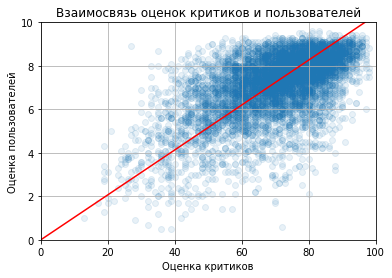

In [ ]:
k_c_to_u = df["critic_score"].mean() / df["user_score"].mean()
line = pd.DataFrame([[0, 0], [10 * k_c_to_u, 10]])

plt.scatter(x=df["critic_score"], y=df["user_score"], alpha=0.1)
plt.plot(line[0], line[1], color='r')

plt.xlabel('Оценка критиков')
plt.ylabel('Оценка пользователей')
plt.title('Взаимосвязь оценок критиков и пользователей')
plt.xlim(0, 100),
plt.ylim(0, 10),
plt.grid(True)

По графику видно, что построенная прямая равноудалена от всех существующих точек, а значит, сделанное предположение можно использовать для обработки данных. Для этого создадим функции `rep_c_sc` и `rep_u_sc`.

In [ ]:
def rep_c_sc(row):
    u_sc = row['user_score']
    return round(u_sc * k_c_to_u, 1)


def rep_u_sc(row):
    c_sc = row['critic_score']
    return round(c_sc / k_c_to_u, 1)

In [ ]:
df.loc[df["critic_score"].isna() & df["user_score"].notna(),
       'critic_score'] = df.apply(rep_c_sc, axis=1)
df.loc[df["critic_score"].notna() & df["user_score"].isna(),
       'user_score'] = df.apply(rep_u_sc, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     8710 non-null   float64       
 9   user_score       8710 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 2.0+ MB


В результате обработки столбцов `critic_score` и `user_score` количество пропусков уменьшено на 1693 (9,2%) по сравнению с первоначальным результатом.

**Перейдем к изучению дубликатов.**

В исследуемой таблице отсутствуют явные дубликаты.

In [ ]:
df.duplicated().sum()

0

Неявные дубликаты также отсутствуют в столбцах о жанре и платформе, однако присутствуют в столбце с названием игры.

In [ ]:
df["name"].value_counts().head(10)

need for speed: most wanted     12
ratatouille                      9
lego marvel super heroes         9
fifa 14                          9
madden nfl 07                    9
lego the hobbit                  8
fifa soccer 13                   8
terraria                         8
lego harry potter: years 5-7     8
monopoly                         8
Name: name, dtype: int64

Полученный результат говорит о том, что в таблице кроссплатформенные игры внесены отдельными строками для каждой платформы. Выведем дубликаты таблицы, сузив просматриваемый диапазон до столбцов с именем и платформой.

In [ ]:
df.loc[df[["name", "platform"]].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,need for speed: most wanted,x360,2005-01-01,racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,sonic the hedgehog,ps3,NaT,platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,need for speed: most wanted,pc,2012-01-01,racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,madden nfl 13,ps3,2012-01-01,sports,0.0,0.01,0.00,0.00,83.0,5.5,E


В полученной таблице видно три игры, которые повторяются несколько раз с одинаковыми значениями в рассматриваемых столбцах. Выведем все строки с игрой "Need For Speed: Most Wanted".

In [ ]:
df.loc[df["name"] == "need for speed: most wanted"].sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6410,need for speed: most wanted,ds,2005-01-01,racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6473,need for speed: most wanted,gba,2005-01-01,racing,0.19,0.07,0.00,0.00,80.3,8.3,E
3581,need for speed: most wanted,gc,2005-01-01,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,pc,2005-01-01,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,need for speed: most wanted,pc,2012-01-01,racing,0.00,0.06,0.00,0.02,82.0,8.5,T
253,need for speed: most wanted,ps2,2005-01-01,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,ps3,2012-01-01,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
2048,need for speed: most wanted,psv,2012-01-01,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
6273,need for speed: most wanted,wiiu,2013-01-01,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
1190,need for speed: most wanted,x360,2012-01-01,racing,0.62,0.78,0.01,0.15,83.0,8.5,T


По срезу хорошо видно, что игра дважды выходила на PC и X360 в 2005 и 2012 годах. В этих годах действительно выходили ремейки игры, в связи с чем считать строки дубликатами некорректно.

Выведем все строки с игрой "Sonic The Hedgehog".

In [ ]:
df.loc[df["name"] == "sonic the hedgehog"].sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,sonic the hedgehog,gen,1991-01-01,platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,sonic the hedgehog,ps3,2006-01-01,platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,sonic the hedgehog,ps3,NaT,platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
1996,sonic the hedgehog,x360,2006-01-01,platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+


По полученному срезу видно, что строки 1745 и 4127 дублируют друг друга по названию, платформе и рейтингам. В то же время по продажам в Европе данные различаются. Удалим из таблицы сроку 4127, предварительно просуммировав указанные значения.

In [ ]:
df.loc[1745, 'eu_sales'] += df.loc[4127, 'eu_sales']

df = df.drop(4127)

df.loc[df["name"] == "sonic the hedgehog"].sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,sonic the hedgehog,gen,1991-01-01,platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,sonic the hedgehog,ps3,2006-01-01,platform,0.41,0.54,0.04,0.66,43.0,4.1,E10+
1996,sonic the hedgehog,x360,2006-01-01,platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+


Выведем все строки с игрой "Madden NFL 13".

In [ ]:
df.loc[df["name"] == "madden nfl 13"].sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012-01-01,sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,madden nfl 13,ps3,2012-01-01,sports,0.00,0.01,0.0,0.00,83.0,5.5,E
5887,madden nfl 13,psv,2012-01-01,sports,0.28,0.00,0.0,0.02,63.0,7.3,E
3986,madden nfl 13,wii,2012-01-01,sports,0.47,0.00,0.0,0.03,70.7,7.3,E
7066,madden nfl 13,wiiu,2012-01-01,sports,0.21,0.00,0.0,0.02,75.0,6.7,E
507,madden nfl 13,x360,2012-01-01,sports,2.53,0.15,0.0,0.17,81.0,5.8,E


Видно, что аналогично случаю с игрой "Sonic The Hedgehog", строки 604 и 16230 дублируют друг друга. Исключим из рассмотрения строку 16230.

In [ ]:
df.loc[604, 'eu_sales'] += df.loc[16230, 'eu_sales']

df = df.drop(16230)

df.loc[df["name"] == "madden nfl 13"].sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012-01-01,sports,2.11,0.23,0.0,0.23,83.0,5.5,E
5887,madden nfl 13,psv,2012-01-01,sports,0.28,0.00,0.0,0.02,63.0,7.3,E
3986,madden nfl 13,wii,2012-01-01,sports,0.47,0.00,0.0,0.03,70.7,7.3,E
7066,madden nfl 13,wiiu,2012-01-01,sports,0.21,0.00,0.0,0.02,75.0,6.7,E
507,madden nfl 13,x360,2012-01-01,sports,2.53,0.15,0.0,0.17,81.0,5.8,E


По данным об игре "Need For Speed: Most Wanted" хорошо видно, что в таблице встречаются пропуски в столбцах с рейтингом для кроссплатформенных игр. Учитывая, что рейтинг игры не должен зависеть от платформы, такие пропуски можно обрабатывать. Для этого создадим функции `rep_rating`, `rep_c_sc_2`, `rep_u_sc_2`, которые используют данные о названии игры и ее годе выхода и восстанавливают значения в соответствующих столбцах. 

In [ ]:
def rep_rating(row):
    name = row['name']
    year = row['year_of_release']
    return df.loc[(df['name'] == name) & (df['year_of_release'] == year) &
                  (df['rating'].notna()), 'rating'].max()


def rep_c_sc_2(row):
    name = row['name']
    year = row['year_of_release']
    return df.loc[(df['name'] == name) & (df['year_of_release'] == year),
                  'critic_score'].mean()


def rep_u_sc_2(row):
    name = row['name']
    year = row['year_of_release']
    return df.loc[(df['name'] == name) & (df['year_of_release'] == year),
                  'user_score'].mean()

In [ ]:
df.loc[df["rating"].isna(), 'rating'] = df.apply(rep_rating, axis=1)

df.loc[df["critic_score"].isna(), 'critic_score'] = df.apply(rep_c_sc_2,
                                                             axis=1)

df.loc[df["user_score"].isna(), 'user_score'] = df.apply(rep_u_sc_2, axis=1)

На примере таблицы с информацией об игре "Need For Speed: Most Wanted" убедимся в правильности работы функций. И выведем общую информацию по таблице.

In [ ]:
df.loc[df["name"] == "need for speed: most wanted"].sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6410,need for speed: most wanted,ds,2005-01-01,racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6473,need for speed: most wanted,gba,2005-01-01,racing,0.19,0.07,0.00,0.00,80.3,8.3,E
3581,need for speed: most wanted,gc,2005-01-01,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,pc,2005-01-01,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,need for speed: most wanted,pc,2012-01-01,racing,0.00,0.06,0.00,0.02,82.0,8.5,T
253,need for speed: most wanted,ps2,2005-01-01,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,ps3,2012-01-01,racing,0.71,1.46,0.06,0.58,82.5,8.5,T
2048,need for speed: most wanted,psv,2012-01-01,racing,0.33,0.45,0.01,0.22,82.5,8.5,T
6273,need for speed: most wanted,wiiu,2013-01-01,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
1190,need for speed: most wanted,x360,2012-01-01,racing,0.62,0.78,0.01,0.15,83.0,8.5,T


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16711 non-null  object        
 1   platform         16711 non-null  object        
 2   year_of_release  16443 non-null  datetime64[ns]
 3   genre            16711 non-null  object        
 4   na_sales         16711 non-null  float64       
 5   eu_sales         16711 non-null  float64       
 6   jp_sales         16711 non-null  float64       
 7   other_sales      16711 non-null  float64       
 8   critic_score     9182 non-null   float64       
 9   user_score       9182 non-null   float64       
 10  rating           10156 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 2.0+ MB


В результате обработки пропусков и удаления дубликатов таблица уменьшилась на 4 строки, а количество пропусков сократилось до 14,4% от общего числа данных.

## Добавление столбцов

Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец. Для этого создадим функцию `ttl_sales_calc`.

In [ ]:
def ttl_sales_calc(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row[
        'other_sales']

In [ ]:
df['ttl_sales'] = df.apply(ttl_sales_calc, axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ttl_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Функция отработала, как от нее и ожидалось

## Заключение по предобработке данных

В ходе предобработки данных:
1. исправлены явные ошибки в данных:
    * неправильные наименований столбцов
    * разный регистр содержимого столбцов;
    * тип хранения данных;
    * неявные пропуски;
2. обработаны пропуски и удалены дубликаты;
3. добавлен столбец с суммарными продажами.

В результате, исходная таблица сократилась всего на 4 строки, при этом количество пропусков уменьшилось на 437 штук.

# Анализ данных

## Анализ количества выпускаемых игр и объема их продаж

В начале анализа целесообразно выяснить, важны ли данные за все время - с 1980 года.
Для этого сначала определим, сколько игр выпускалось в разные годы.

In [ ]:
#---Определяем цвета для каждой платформы----
platforms = sorted(df['platform'].unique())
cmap = plt.get_cmap('tab20b')
colors = [cmap(i) for i in np.linspace(0, 1, len(platforms))]
dict_platf_colors = {}

for i in range(len(platforms)):
    dict_platf_colors[platforms[i]] = colors[i]


#---Функция графика---
def plot_games_on_years(agg,
                        fsz=(12, 10),
                        data=df,
                        clr=dict_platf_colors,
                        ttl=True):
    plt.figure(figsize=fsz)

    for k, v in clr.items():
        plt.plot(data.loc[data['platform'] == k].pivot_table(
            index='year_of_release', values='ttl_sales', aggfunc=agg),
                 label=k,
                 color=v)
    if ttl == True:
        plt.plot(data.pivot_table(index='year_of_release',
                                  values='ttl_sales',
                                  aggfunc=agg),
                 label='суммарно')
    plt.xlabel('Года')
    plt.grid(True)
    plt.legend(loc='upper left')

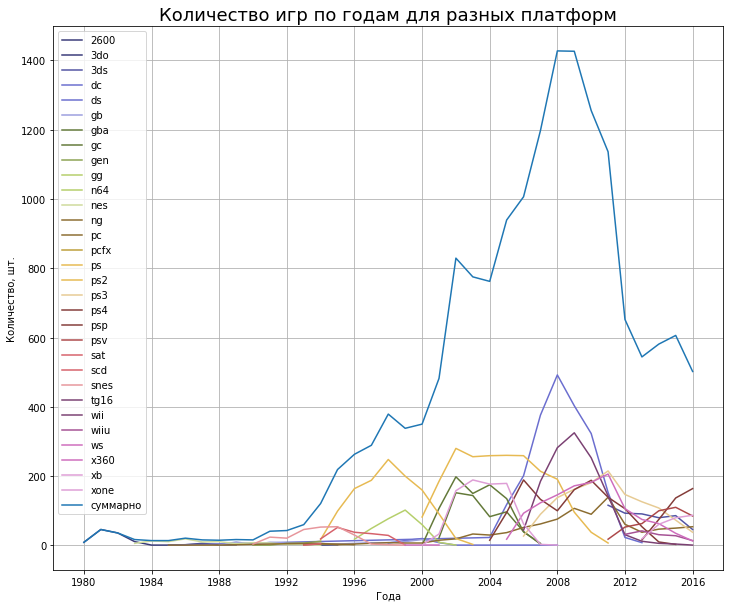

In [ ]:
plot_games_on_years('count')
plt.ylabel('Количество, шт.')
plt.title('Количество игр по годам для разных платформ', size=18)
plt.show()

In [ ]:
300 / 1400

0.21428571428571427

По графику хорошо видно, что в 2008-2009 годах количество игр было на максимуме - более 1400 штук. Это было обеспечено благодаря беспрецедентному количеству игр на платформах Nintendo DS (более 30% всего количества игр в 2008 году) и Wii (более 20% в 2009 году). Затем, к 2016 году виден спад. 

Учитывая, что Nintendo DS - карманная консоль, спад может объясняться выходом на рынок смартфонов (первый iPhone - 2007) и стремительного развития мобильных игр. В этой связи, определенная группа пользователей могла отказаться от игр на рассматриваемых платформах в пользу мобильных игр.

Количество игр для разных консолей меняется со временем - на графике видны циклы роста и спада для каждой платформы. Это может быть обусловлено сменой поколений платформ. Для более точного определения длительности циклов рассмотрим данные об объеме продаж.

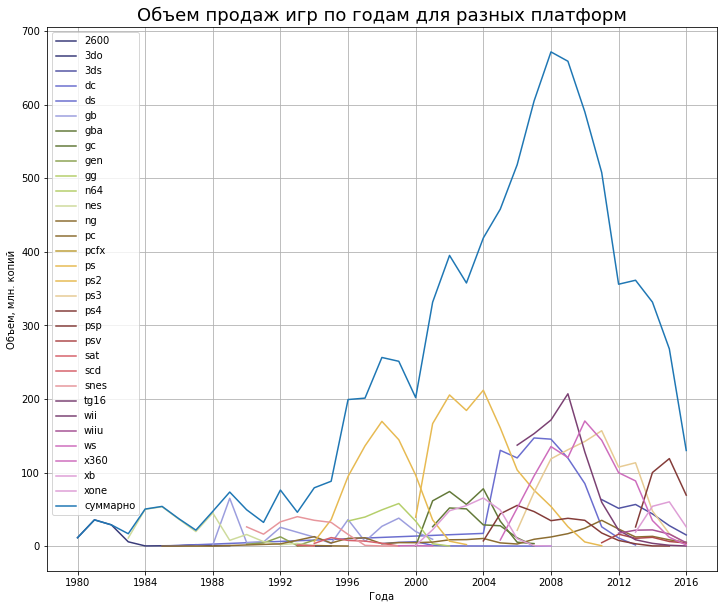

In [ ]:
plot_games_on_years('sum')
plt.ylabel('Объем, млн. копий')
plt.title('Объем продаж игр по годам для разных платформ', size=18)
plt.show()

В целом, полученный график подтверждает результат по количеству игр. В то же время по объему продаж лучше виден интервал смены поколений, который проявляется в виде пиков для разных консолей и составляет 5-7 лет.

Уточним построенный график только для платформ-лидеров рынка. К последним будем причислять тех, у кого суммарный объем продаж больше третьего квантиля во всей таблице.

In [ ]:
df.pivot_table(index=['platform'], values='ttl_sales',
               aggfunc='sum').describe()

,ttl_sales
count,31.000000
mean,287.525484
std,348.220029
min,0.030000
25%,22.150000
50%,200.040000
75%,304.095000
max,1255.770000


Третий квантиль - 304 млн. копий.

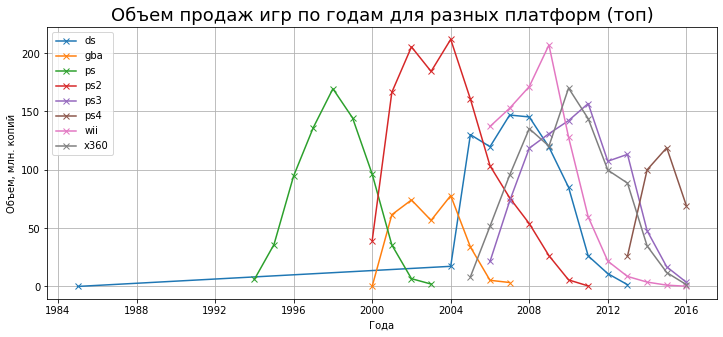

In [ ]:
plt.figure(figsize=(12, 5))

platforms_top = sorted(
    df.pivot_table(index=['platform'], values='ttl_sales',
                   aggfunc='sum').query('ttl_sales > 304').index)

for i in platforms_top:
    plt.plot(
        df.loc[df['platform'] == i].pivot_table(index='year_of_release',
                                                values='ttl_sales',
                                                aggfunc='sum'),
        label=i,
        marker='x',
    )

plt.xlabel('Года')
plt.ylabel('Объем, млн. копий')
plt.title('Объем продаж игр по годам для разных платформ (топ)', size=18)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

Полученный график подтверждает предположение о том, что поколения платформ сменяются за 5-7 лет. Снижение объема продаж игр для Sony Playstation 4 в 2016, скорее всего, является следствием неполноты данных за год, чем "прохождением" пика популярности.

Таким образом, жизненный цикл платформы можно описать в трех стадиях:
1. развитие и рост объема продаж в течение 2-4 лет;
1. пик популярности в течение 1-4 лет с небольшими колебаниями объемов продаж;
1. увядание и спад в течение 4-6 лет до вывода платформы с рынка.

По графику виден выброс для Nintendo DS - это игра Strongest Tokyo University Shogi DS. По всей видимости, для нее неправильно указана платформа. Учитывая, что год выхода игры вне обозначенного выше диапазона - обрабатывать этот выброс представляется нецелесообразным.

## Анализ объема продаж за последние годы

Рассмотрение промежутков времени больше 5 лет будем считать нецелесообразным для планирования маркетинговых кампаний ввиду высокого темпа смены поколений. Учитывая, что данные за 2016 год - не полные, сделаем такой срез начиная с 2011 года включительно и заканчивая 2015 годом включительно. 

In [ ]:
df_5y = df.loc[(df['year_of_release'] >= '2011-01-01')
               & (df['year_of_release'] <= '2015-01-01')]
df_5y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3519 entries, 16 to 16707
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             3519 non-null   object        
 1   platform         3519 non-null   object        
 2   year_of_release  3519 non-null   datetime64[ns]
 3   genre            3519 non-null   object        
 4   na_sales         3519 non-null   float64       
 5   eu_sales         3519 non-null   float64       
 6   jp_sales         3519 non-null   float64       
 7   other_sales      3519 non-null   float64       
 8   critic_score     1954 non-null   float64       
 9   user_score       1954 non-null   float64       
 10  rating           2109 non-null   object        
 11  ttl_sales        3519 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 357.4+ KB


In [ ]:
3519 / 16711

0.2105798575788403

От общего объема данных осталось около 21% данных. 
Полученное значение можно считать приемлемым, так как более старые данные не несут большой информационной нагрузки и планирование маркетинговой кампаний для геймеров 1980х годов бессмысленно. В этой связи, дальнейшие исследования будем проводить с новой таблицей.

Построим аналогичные приведенным выше графики для среза данных.

In [ ]:
#---Определяем цвета для каждой платформы----
platforms_5y = sorted(df_5y['platform'].unique())
colors_5y = [cmap(i) for i in np.linspace(0, 1, len(platforms_5y))]
dict_platf_colors_5y = {}

for i in range(len(platforms_5y)):
    dict_platf_colors_5y[platforms_5y[i]] = colors_5y[i]

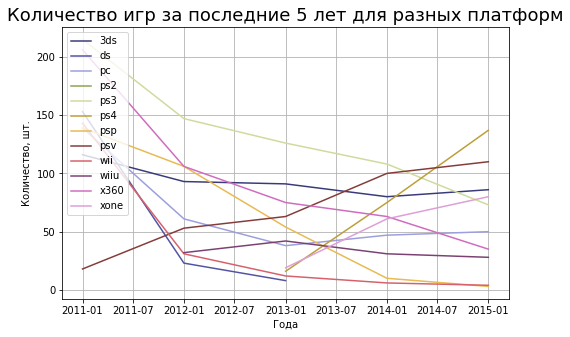

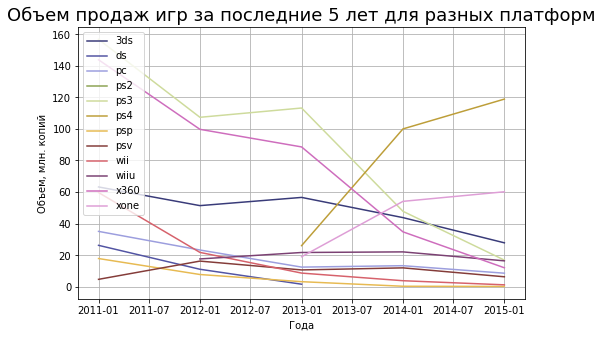

In [ ]:
plot_games_on_years('count', (8, 5), df_5y, dict_platf_colors_5y, False)
plt.ylabel('Количество, шт.')
plt.title('Количество игр за последние 5 лет для разных платформ', size=18)

plot_games_on_years('sum', (8, 5), df_5y, dict_platf_colors_5y, False)
plt.ylabel('Объем, млн. копий')
plt.title('Объем продаж игр за последние 5 лет для разных платформ', size=18)
plt.show()

Из полученных графиков можно сделать следующие выводы:

* в 2013 году вышли на рынок Sony Playstation 4 и Xbox One - количество игр и объем продаж обеих платформ растет, а следовательно, они находятся на стадии развития;
* количество игр для PC с 2013 года увеличивается, но объем продаж изменяется не сильно. Это, по всей видимости, объясняется выходом кроссплатформенных игр для Sony Playstation 4 и Xbox One;
* в 2011 году вышла на рынок Sony PS Vita - количество игр увеличивается, а объем продаж начал снижаться. Такое распределение может свидетельствовать о нахождении на пике популярности или даже его прохождении.
* остальные платформы находятся на стадии увядания.

В этой связи, потенциально прибыльными платформами в 2016-2017 годах являются Sony Playstation 4 и Xbox One.

## Анализ объема продаж по квантилям

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам для полной таблицы.

In [ ]:
def boxplot_platforms_sales(fsz, pltfrms, data):
    plt.figure(figsize=(fsz))

    j = 1
    for i in pltfrms:
        j += 1
        plt.boxplot(data.loc[df['platform'] == i].pivot_table(
            index='year_of_release', values='ttl_sales', aggfunc='sum'),
                    positions=[j],
                    labels=[i],
                    patch_artist=True,
                    widths=.5,
                    medianprops={
                        "color": "r",
                        "linewidth": 1
                    },
                    boxprops={
                        "facecolor": "C0",
                        "edgecolor": "white",
                        "linewidth": 0.5
                    },
                    whiskerprops={
                        "color": "C0",
                        "linewidth": 1.5
                    },
                    capprops={
                        "color": "C0",
                        "linewidth": 1.5
                    })

    plt.ylabel('Объем продаж игр в год, млн. копий')
    plt.xlabel('Названия платформ')
    plt.grid(True)

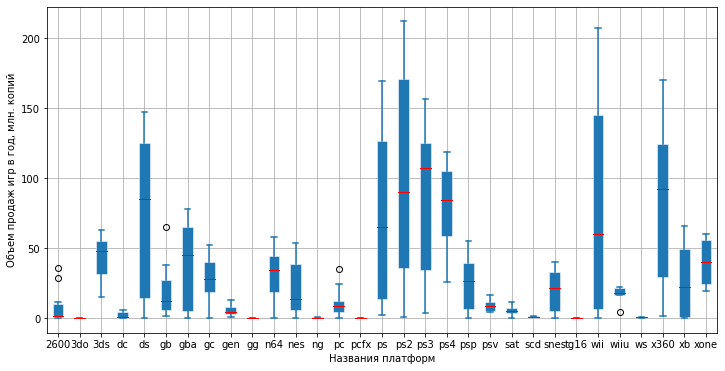

In [ ]:
boxplot_platforms_sales((12, 6), platforms, df)
plt.show()

По построенному графику хорошо видно, что в таблице практически нет выбросов. 

Самая продаваемая платформа - Sony Playstation 2: 75% лет, которые она присутствует на рынке, объем продаж в год превышал 170 млн. копий. 

"Ус" вверх на графике - соответствует продажам на пике популярности, в то время, как "ус" вниз - на стадиях развития или увядания.

У большинства платформ медианное значение близко к середине "ящика" - то есть к среднему значению количества продаж.

Посмотрим те же ящики, но за последние 5 лет.

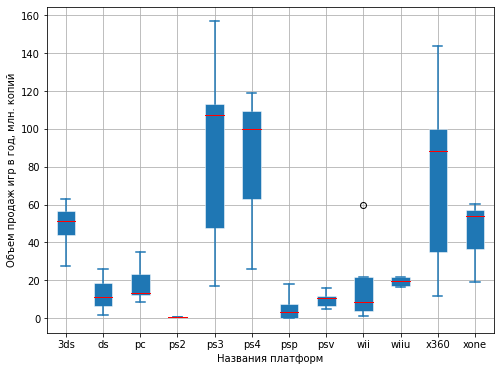

In [ ]:
boxplot_platforms_sales((8, 6), platforms_5y, df_5y)
plt.show()

Картина качественно изменилась: здесь лидирует по объему продаж Sony Playstation 3 (почти до 160 млн. копий в лучшие года) и незначительно отстает Xbox 360 (около 145 млн. копий в год). Самые перспективные платформы по данному показателю отстают. Таким образом, согласно полученным графикам, наиболее перспективными являются Sony Playstation 3 и Xbox 360, что не соответствует действительности. В этой связи, можно сделать следующие выводы:

1. "ящик с усами" показывает обобщенную характеристику по платформам;
1. "ящик с усами" не позволяет адекватно выделить перспективные платформы;
1. для планирования маркетинговых кампаний, пользоваться "ящиком с усами" нецелесообразно.

## Анализ влияния оценок пользователей и критиков

Посмотрим влияние на продажи игр для одной платформы отзывов пользователей и критиков. Для этого построим диаграмму рассеяния. В качестве "подопытной" платформы возьмем Sony Playstation 3, которая в исходной таблице прошла через 3 жизненных цикла, а следовательно, данные для нее наиболее релевантны.

In [ ]:
def scatter_score_platform(platform):
    _, axs = plt.subplots(1, 2, figsize=(18, 5))

    x = [
        df.loc[df['platform'] == platform, ['critic_score']],
        df.loc[df['platform'] == platform, ['user_score']]
    ]
    xlabel = ['Рейтинг критиков', 'Рейтинг пользователей']
    for i in range(2):
        axs[i].scatter(x[i], df.loc[df['platform'] == platform, ['ttl_sales']])
        axs[i].set_xlabel(xlabel[i])
        axs[i].set_ylabel('Объем продаж, млн. копий')
        axs[i].grid(True)
        axs[i].set_ylim(0, 5)
    axs[1].set_xlim(0, 10)

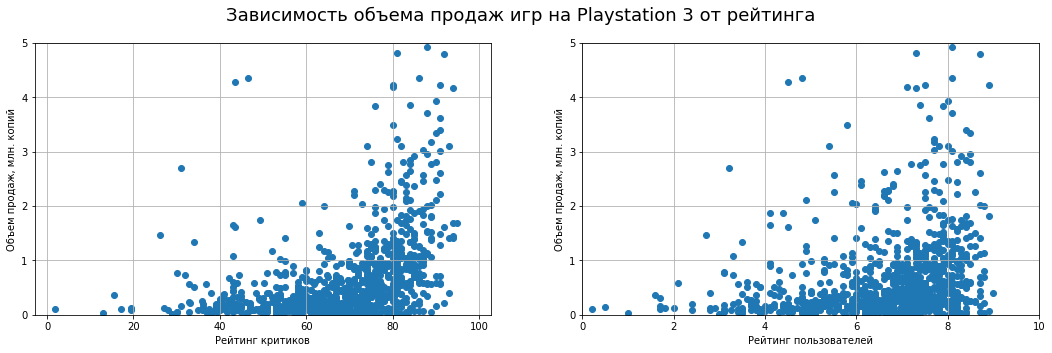

In [ ]:
scatter_score_platform('ps3')

plt.suptitle('Зависимость объема продаж игр на Playstation 3 от рейтинга',
             size=18)
plt.show()

По полученным диаграммам хорошо видно, что после рейтинга 70 для критиков и 7 для пользователей существенно увеличивается объем продаж.

Посчитаем коэффициент корреляцию между оценкой игр и объемами их продаж.

In [ ]:
df.loc[df['platform'] == 'ps3',
       'critic_score'].corr(df.loc[df['platform'] == 'ps3', 'ttl_sales'])

0.38669576579843534

In [ ]:
df.loc[df['platform'] == 'ps3',
       'user_score'].corr(df.loc[df['platform'] == 'ps3', 'ttl_sales'])

0.13285142359512028

Корреляция объема продаж с оценкой критиков сильнее. Это может быть связано с тем, что пользователи оценивают игры по собственным впечатлениям и зачастую эмоционально. В то время, как критики - обоснованно, по формализованным процедурам и признакам.

Построим гистограммы для коэффициентов корреляции по всем платформам.

C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


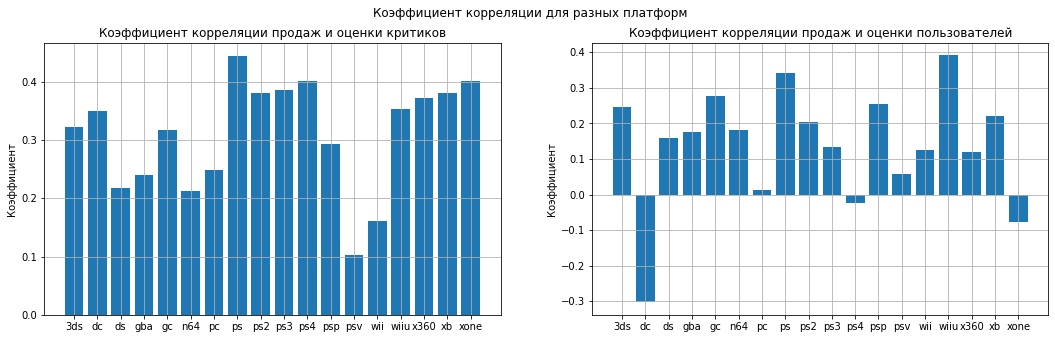

In [ ]:
def bar_score_sales_corr_platform():

    _, axs = plt.subplots(1, 2, figsize=(18, 5))

    c_sc = df.groupby('platform')['critic_score'].corr(
        df['ttl_sales']).dropna()
    u_sc = df.groupby('platform')['user_score'].corr(df['ttl_sales']).dropna()

    x = [c_sc.index, u_sc.index]
    height = [c_sc.tolist(), u_sc.tolist()]

    ylabel = ['Рейтинг критиков', 'Рейтинг пользователей']

    for i in range(2):
        axs[i].bar(x[i], height[i])
        axs[i].set_ylabel('Коэффициент')
        axs[i].grid(True)
    axs[0].set_title('Коэффициент корреляции продаж и оценки критиков')
    axs[1].set_title('Коэффициент корреляции продаж и оценки пользователей')
    plt.suptitle('Коэффициент корреляции для разных платформ')


bar_score_sales_corr_platform()
plt.show()

По гистограммам видно, что коэффициент корреляции для разных платформ - свой. Кроме того, подтверждается предположение, что оценка критиков адекватнее, так как для оценки пользователей присутствуют отрицательные значения для трех платформ: перспективных Sony Playstation 4 и Xbox One и Sega Dreamcast. такие значения означают, что чем ниже рейтинг - тем выше продажи, что в свою очередь подтверждает не всегда оправданные ожидания пользователей, особенно в отношении новых платформ.

Построим графики плотности распределения коэффициентов корреляции.

C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\1\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\numpy\

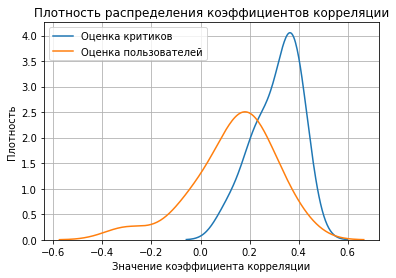

In [ ]:
sns.distplot(df.groupby('platform')['critic_score'].corr(
    df['ttl_sales']).dropna().round(2),
             hist=False,
             label='Оценка критиков')
sns.distplot(df.groupby('platform')['user_score'].corr(
    df['ttl_sales']).dropna().round(2),
             hist=False,
             label='Оценка пользователей')
plt.grid(True)
plt.legend()
plt.title('Плотность распределения коэффициентов корреляции')
plt.ylabel('Плотность')
plt.xlabel('Значение коэффициента корреляции')
plt.show()

Графики подтверждают сделанные ранее выводы - пользовательская оценка имеет очень широкое распределение. Следовательно, ее коэффициент корреляции с объемом продаж может иметь значение в широком диапазоне. Плотность распределения оценки критиков существенно уже, а значит, она лучше соотносится с объемом продаж и может быть использована для планирования маркетинговых кампаний.

## Анализ жанров

Исследуем общее распределение игр по жанрам. Для этого построим гистограммы распределения количества игр по жанрам и их средний объем продаж. Для удобства анализа гистограммы выведем в абсолютных величинах, и в относительных - процентном отношении к общему количеству.

In [ ]:
def bar_genre(norm=False):
    _, axs = plt.subplots(1, 2, figsize=(16, 5))

    cnt_full = df.pivot_table(index='genre',
                              values='ttl_sales',
                              aggfunc='count')['ttl_sales']
    mn_full = df.pivot_table(index='genre', values='ttl_sales',
                             aggfunc='mean')['ttl_sales']

    ylabel = ['Количество игр, шт', 'Средний объем продаж, млн. копий']

    if norm == True:
        cnt_full = cnt_full / cnt_full.sum() * 100
        mn_full = mn_full / mn_full.sum() * 100
        ylabel = ['Количество игр, %', 'Средний объем продаж, %']

    x_full = [cnt_full.index, mn_full.index]
    height_full = [cnt_full.tolist(), mn_full.tolist()]

    for i in range(2):
        axs[i].bar(
            x=np.arange(len(cnt_full)) + .4,
            height=height_full[i],
            width=0.4,
            label='Полные данные',
        )
        axs[i].set_ylabel(ylabel[i])
        axs[i].grid(True)
        axs[i].set_xlabel('Жанры')
        axs[i].set_xticklabels(x_full[i], rotation='vertical')

    cnt_5y = df_5y.pivot_table(index='genre',
                               values='ttl_sales',
                               aggfunc='count')['ttl_sales']
    mn_5y = df_5y.pivot_table(index='genre',
                              values='ttl_sales',
                              aggfunc='mean')['ttl_sales']
    if norm == True:
        cnt_5y = cnt_5y / cnt_5y.sum() * 100
        mn_5y = mn_5y / mn_5y.sum() * 100
    x_5y = [cnt_5y.index, mn_5y.index]
    height_5y = [cnt_5y.tolist(), mn_5y.tolist()]

    for i in range(2):
        axs[i].bar(
            x_5y[i],
            height_5y[i],
            width=0.4,
            label='Данные за 5 лет',
        )
        axs[i].set_ylabel(ylabel[i])
        axs[i].grid(True)
        axs[i].set_xlabel('Жанры')
        axs[i].set_xticklabels(x_5y[i], rotation='vertical')
        axs[i].legend()

C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


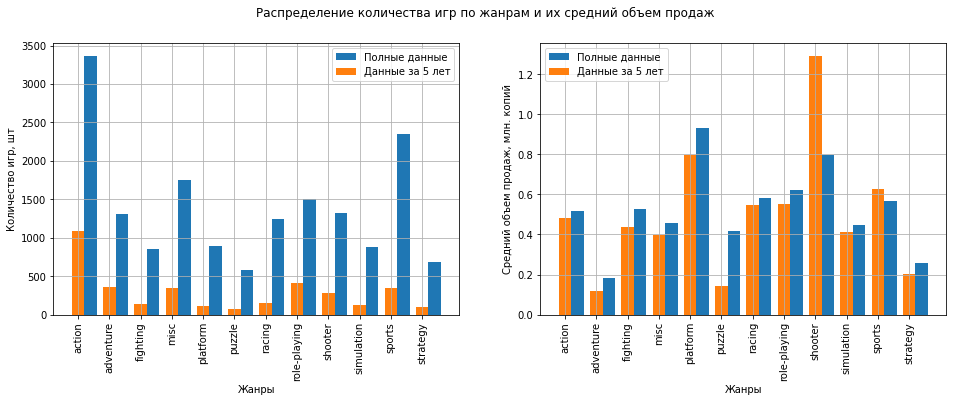

In [ ]:
bar_genre()
plt.suptitle(
    'Распределение количества игр по жанрам и их средний объем продаж')
plt.show()

C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Anaconda3\envs\praktikum_env_win_new\lib\site-packages\ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


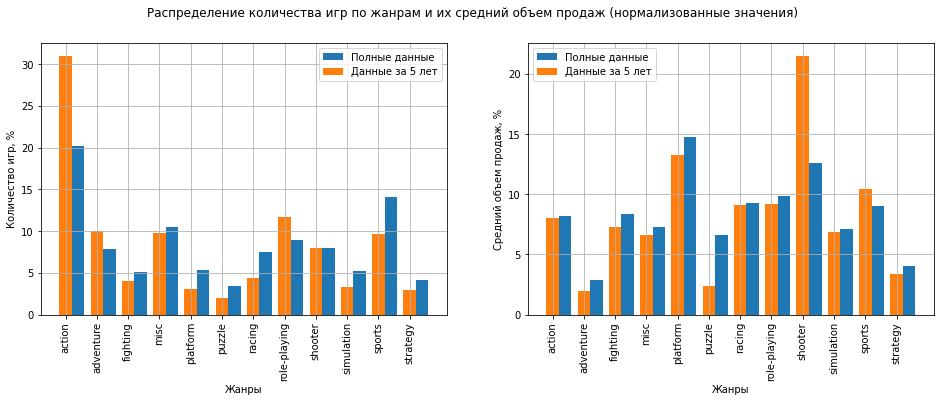

In [ ]:
bar_genre(norm=True)
plt.suptitle(
    'Распределение количества игр по жанрам и их средний объем продаж (нормализованные значения)'
)
plt.show()

Полученные **по полным данным** гистограммы хорошо иллюстрируют, что  экшены и спортивные игры лидируют по общему количеству. Первых 3369 шт. (21% от общего числа игр), а вторых почти на 2347 шт. меньше (14%). В то же время, по продаваемости их обходят платформеры, средние продажи которых 0,93 млн. копий в год (15%), и шутеры - 0,8 млн. копий (12%).

Анализ среза данных за **последние 5 лет** показывает, что по количеству копий также лидируют экшены, однако их доля в общей массе возрсла и составляет 31%. Спортивные игры уже не так сильно выделяются на фоне остальных жанров и их количество не превосходит 10%. При этом продаваемость шутеров в последние 5 лет увеличилась почти до 22% от общего числа. 

Таким образом, очевидно, что предпочтения пользователей по жанрам со временем меняются, что необходимо использовать при планировании маркетинговых кампаний. В этой связи можно говорить о подтверждении сделанных ранее выводов о том, что использование полного набора данных для планирования маркетинговых исследований нецелесообразно. 

## Анализ различия регионов

Составим портрет пользователя каждого региона: NA, EU, JP. Для этого сначала определим самые популярные платформы (топ-5). Учитывая полученные ранее результаты, в рассмотрение возьмем только данные за последние 5 лет.

In [ ]:
def bar_region(df, ind, ylimit):
    _, axs = plt.subplots(1, 3, figsize=(16, 5))

    na = df.pivot_table(index=ind, values=['na_sales'],
                        aggfunc='mean').sort_values(by='na_sales',
                                                    ascending=False).head()
    eu = df.pivot_table(index=ind, values=['eu_sales'],
                        aggfunc='mean').sort_values(by='eu_sales',
                                                    ascending=False).head()
    jp = df.pivot_table(index=ind, values=['jp_sales'],
                        aggfunc='mean').sort_values(by='jp_sales',
                                                    ascending=False).head()

    x = [na.index, eu.index, jp.index]
    height = [
        na['na_sales'].tolist(), eu['eu_sales'].tolist(),
        jp['jp_sales'].tolist()
    ]
    titles = ['Северная Америка', 'Европа', 'Япония']

    for i in range(3):
        axs[i].bar(x[i], height[i])
        axs[i].set_ylabel('Объем продаж, млн. копий')
        axs[i].grid(True)
        axs[i].set_ylim(0, ylimit)
        axs[i].set_title(titles[i])
        axs[i].set_xlabel(
            f'Общее количество продаж {round(sum(height[i]), 2)} млн. копий')

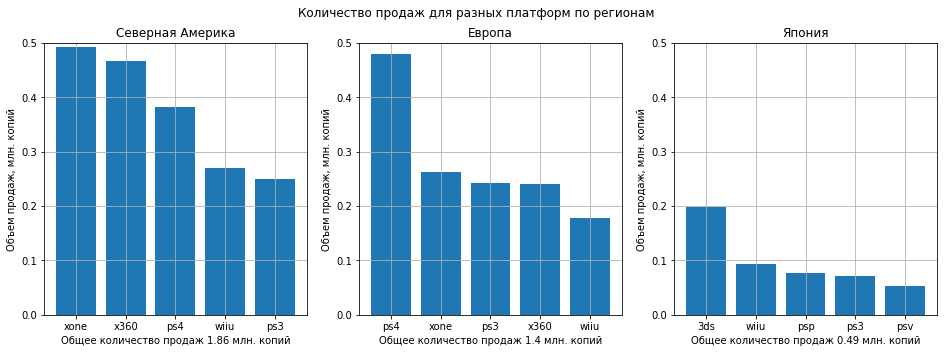

In [ ]:
bar_region(df_5y, 'platform', .5)
plt.suptitle('Количество продаж для разных платформ по регионам')
plt.show()

По гистограммам можно сделать следующие выводы:

* в Японии совсем отсутствуют приставки Microsoft, а топ-5 разделяют приставки от Sony и Nintendo, причем первая тройка - это мобильные платформы;

* в Америке больше предпочитают приставки Microsoft, а Sony Playstation 4 только на 3-ем месте;

* в Европе - наоборот, больше играют в приставки Sony;

* в Европе на 25% меньше продаж, чем в Америке, а в Японии - на 68%.

Определим самые популярные жанры.

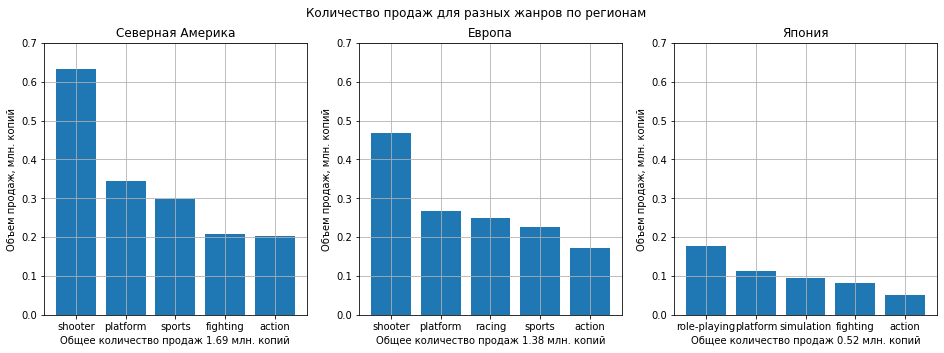

In [ ]:
bar_region(df_5y, 'genre', .7)
plt.suptitle('Количество продаж для разных жанров по регионам')
plt.show()

По гистограммам можно сделать следующие выводы:

* в Японии меньше всего продаж. при этом там самый популярный жанр - РПГ;

* в Европе и Америке - тройка лидирующих жанров одинаковая.

Определим влияние рейтинга ESRB на продажи в отдельном регионе.

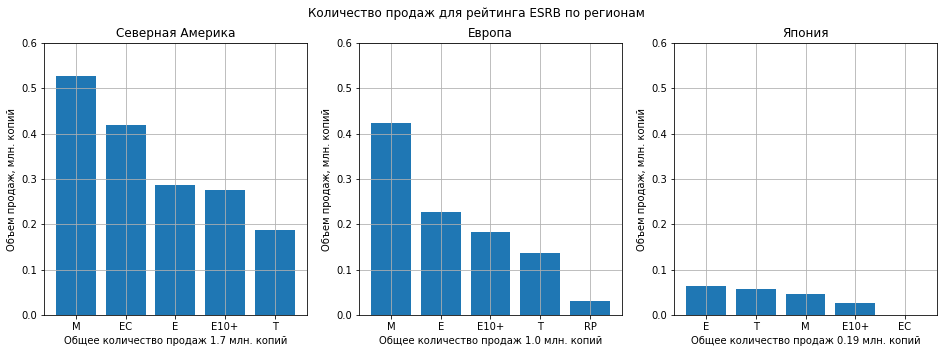

In [ ]:
bar_region(df_5y, 'rating', .6)
plt.suptitle('Количество продаж для рейтинга ESRB по регионам')
plt.show()

Напомним градацию рейтинга ESRB:
- EC - для детей от 3 лет;
- Е - для детей от 6 лет и взрослых;
- Е10+ - для детей от 10 лет и взрослых;
- Т - для подростков от 13 лет и взрослых;
- М - для подростков от 17 лет и взрослых;
- АО - только для взрослых от 18 лет;
- RP - рейтинг ожидается.

По гистограммам можно сделать следующие выводы:

* в Японии, в основном играют в детские игры от 6 лет, 13 лет и только потом взрослы;

* в Европе и Америке - наоборот, больше играют во взрослые игры.

Полученные портреты следует использовать при разработке маркетинговых кампаний.

## Заключение по анализу данных

Поколения платформ сменяются каждые 5-7 лет, при этом жизненный цикл платформы можно описать в трех стадиях:
1. развитие и рост объема продаж в течение 2-4 лет;
1. пик популярности в течение 1-4 лет с небольшими колебаниями объемов продаж;
1. увядание и спад в течение 4-6 лет до вывода платформы с рынка.

Использование графиков типа "ящик с усами" нецелесообразно при планирования маркетинговых кампаний в связи с тем, что он:

1. показывает обобщенную характеристику;
1. не позволяет адекватно выделить перспективные платформы.

Оценка критиков позволяет хорошо прогнозировать объемов продаж игр. 
Коэффициент корреляции указанных характеристик для каждой платформы уникален, а в среднем составляет 0,31. 
В то же время аналогичный коэффициент для пользовательских оценок имеет большой разброс значений, вплоть до отрицательных. 
Это объясняется тем, что пользователи оценивают игры по собственным субъективным впечатлениям и, зачастую, эмоционально. 
В то же время, критики делают это обоснованно, по заранее определенным процедурам и признакам.


Рассмотрение промежутков времени более 5 лет нецелесообразно для планирования маркетинговых кампаний ввиду высокого темпа смены поколений. 
Определенный жизненный цикл и анализ графиков изменения объема продаж игр и их количества позволяет выявить наиболее популярные платформы для проведения кампаний. 
Учитывая рост указанных показателей для Sony Playstation 4 и Xbox One в период с 2013 по 2015 года, они находятся на стадии развития и являются потенциально прибыльными платформами в 2016-2017 годах.

Предпочтения пользователей по жанрам со временем меняются, следовательно, это должно быть использовано при планировании кампаний.
Например, за последние 5 лет наблюдается рост продаваемости шутеров - их объем продаж составляет 22% от общего числа. 

Пользовательское поведение сильно зависит от региона, что так же должно быть учтено при планировании маркетинговых кампаний.
Портреты пользователей по регионам приведены в таблице.

| Регион           | Предпочитаемая приставка | Предпочитаемый жанр           | Предпочитаемый рейтинг ESRB |
| :--------------- | :----------------------- | :---------------------------- | :-------------------------- |
| Северная Америка | Xbox One, Xbox 360, PS 4 | Шутер, платформер, спортивные | M, EC, E |
| Европа           | PS 4, Xbox One, PS 3     | Шутер, платформер, спортивные | M, E, E10+ |
| Япония           | 3DS, WiiU, PSP           | РПГ, платформер, симулятор    | E, T, M |

# Проверка гипотез

Проведем проверку следующих основной и альтернативной гипотез:
* Н0: средние пользовательские рейтинги платформ Xbox One и PC равны;
* Н1: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Отвергать основную гипотезу будем только в том случае, если вероятность ее события выходит за допуск двух СКО (5%).

In [ ]:
result_hyp_n1 = st.ttest_ind(
    df.loc[df["platform"] == "xone"]["user_score"].dropna(),
    df.loc[df["platform"] == "pc"]["user_score"].dropna(),
    equal_var=False,  # Выборки разного размера с разной дисперсией
)
alpha_hyp_1 = 0.05

if result_hyp_n1.pvalue < alpha_hyp_1:
    print(
        f'Вероятность равна {result_hyp_n1.pvalue}. Основная гипотеза отвергается, принимаем альтернативную.'
    )
else:
    print(
        f'Вероятность равна {result_hyp_n1.pvalue}.Основная гипотеза - статистически значимая.'
    )

Вероятность равна 5.33663519912561e-06. Основная гипотеза отвергается, принимаем альтернативную.


Проведем проверку еще одной группы основной и альтернативной гипотез:
* Н0: средние пользовательские рейтинги жанров Action и Sports равны;
* Н1: средние пользовательские рейтинги жанров Action и Sports различаются.

Отвергать основную гипотезу будем только в том случае, если вероятность ее события выходит за допуск двух СКО (5%).

In [ ]:
result_hyp_n2 = st.ttest_ind(
    df.loc[df["genre"] == "action"]["user_score"].dropna(),
    df.loc[df["genre"] == "sports"]["user_score"].dropna(),
    equal_var=False,  # Выборки разного размера с разной дисперсией
)

alpha_hyp_2 = 0.05

if result_hyp_n2.pvalue < alpha_hyp_2:
    print(
        f'Вероятность равна {result_hyp_n2.pvalue}. Основная гипотеза отвергается, принимаем альтернативную.'
    )
else:
    print(
        f'Вероятность равна {result_hyp_n2.pvalue}.Основная гипотеза - статистически значимая.'
    )

Вероятность равна 0.24345903417226358.Основная гипотеза - статистически значимая.


# Вывод

Проведено исследование для отдела маркетинга всемирного интернет-магазина компьютерных игр «Стримчик», в ходе которого изучена структура таблицы, проведены предобработка данных, их анализ, а также выдвинуты и проверены гипотезы.

В изучаемой таблице содержится информация о самих играх, объемах их продаж в разных регионах и оценках. 
Всего 16 715 строк, в которых больше 22 000 пропусков (12%) и ошибки в виде "верблюжьего" стиля и неправильного типа хранения данных. 
В ходе предобработки данных  устранены указанные ошибки, а также удалены дубликаты и добавлен столбец с суммарными продажами.
В результате, исходная таблица сократилась всего на 4 строки, при этом количество пропусков уменьшилось на 437 штук.

Проведенный анализ данных позволил выявить следующие факторы, определяющие успешность игры.
1. **Стадия развития платформы.**
Поколения платформ сменяются каждые 5-7 лет, при этом их жизненный цикл можно разделить на три стадии: **развитие** и рост объема продаж в течение 2-4 лет, **пик популярности** в течение 1-4 лет с небольшими колебаниями объемов продаж и увядание и **спад** в течение 4-6 лет до вывода платформы с рынка.
Определенный жизненный цикл и анализ графиков изменения объема продаж игр и их количества позволяет выявить наиболее популярные платформы для проведения кампаний. 
1. **Временной срез данных.**
Рассмотрение промежутков времени более 5 лет нецелесообразно для планирования маркетинговых кампаний ввиду высокого темпа смены поколений. 
Предпочтения пользователей по жанрам со временем меняются, следовательно, это должно быть использовано при планировании кампаний.
1. **Регион продажи игр.**
Пользовательское поведение (предпочтения по платформам, жанрам, возрастным рейтингам (ESRB) и т.п.) существенным образом зависит от региона.
1. **Оценка игры.**
При этом оценка критиков является более репрезентативной, а оценка пользователей может навредить прогнозу. 
Последнее обусловлено до двух раз меньшим коэффициентом корреляции с объемами продаж, а также его отрицательными значениями.
Это объясняется тем, что пользователи оценивают игры по собственным субъективным впечатлениям и, зачастую, эмоционально. 
В то же время, критики делают это обоснованно, по заранее определенным процедурам и признакам.

Относительно исследуемой таблицы, планирование маркетинговых кампаний на 2016-2017 года должно базироваться на играх, удовлетворяющих следующим факторам.
1. Sony Playstation 4 и Xbox One находятся на стадии развития и являются потенциально прибыльными платформами в 2016-2017 годах.
1. За последние 5 лет наблюдается рост продаваемости шутеров - их объем продаж составляет 22% от общего числа.
1. Указанные платформы и жанр наиболее популярны в Европейском регионе с рейтингом ESRB М, Е, Е10+.
1. Лучшие продажи наблюдаются для игр с оценкой критиков выше 70.